## Wine clustering

In [1]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

wine = load_wine()
print(wine.DESCR)

X=wine['data']
y=wine['target']

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

wine의 label은 class_0,class_1,class_2 총 3가지로 분류되고 13가지 feature가 있다\.

각각의 feature는 다음과 같다.

In [2]:
class_0 = []
class_1 = []
class_2 = []
for i in range(len(y)):
    if y[i] == 0:
        class_0.append(y[i])
    elif y[i] == 1:
        class_1.append(y[i])
    elif y[i] == 2:
        class_2.append(y[i])

print(len(class_0),len(class_1),len(class_2))

59 71 48


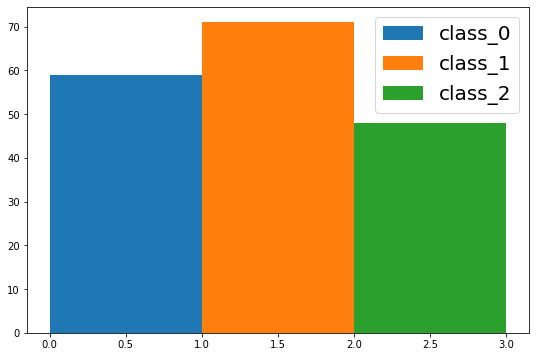

In [3]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)

x_axis = [0.5]
y_axis1 = len(class_0)
y_axis2 = len(class_1)
y_axis3 = len(class_2)

w = 1 #그래프 사이의 폭
ax.bar(np.array(x_axis),y_axis1,width=w,label='class_0')
ax.bar(np.array(x_axis)+w,y_axis2,width=w,label='class_1')
ax.bar(np.array(x_axis)+2*w,y_axis3,width=w,label='class_2')
ax.legend(fontsize=20)

wine의 lable은 class_0,class_1,class_2 총 3가지로 분류되고 그 분포는 위와 같다.
각 lable 59, 71, 48개가 있다.


13가지 feature가 있고 feature는 다음과 같다.

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# k-means clustering

In [5]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
X_pre = StandardScaler().fit_transform(X)

clustering을 하기 전에 StamdardScaler 함수를 이용하여 feature의 값을 평균 0, 분산 1로 normalize하였다.

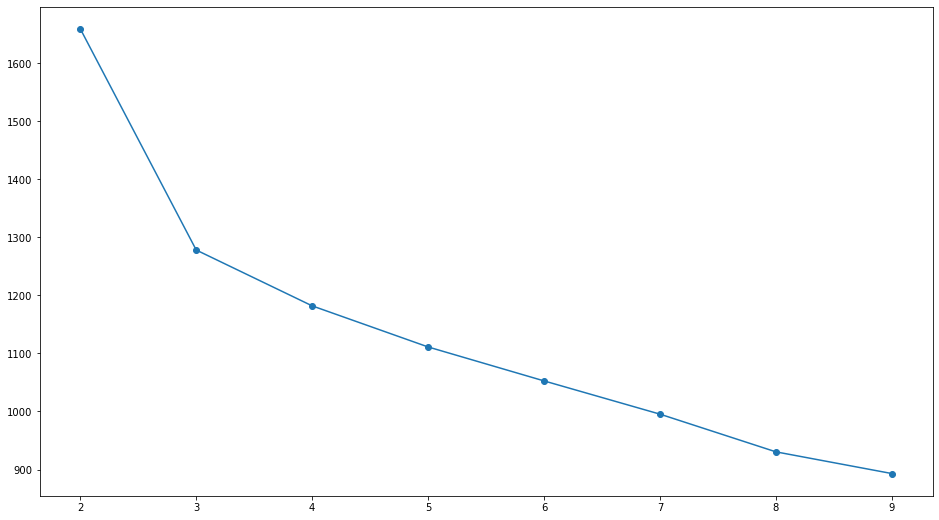

In [6]:
kiner = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pre)
    kiner[k] = kmeans.inertia_
plt.figure(figsize=(16,9))
plt.plot(list(kiner.keys()), list(kiner.values()),'-o')
plt.show()

기울기가 급격하게 변하는 지점이 가장 적절한 cluster의 개수이다\.

cluster의 개수가 3개일 때 가장 급격하게 변하므로 군집의 개수를 3개로 나누면 된다\.

실제로 주어진 와인 데이터의 y는 [0, 1, 2] 3가지로 군집의 개수를 3개로 training을 하면 잘 분류할 수 있을 것이다.

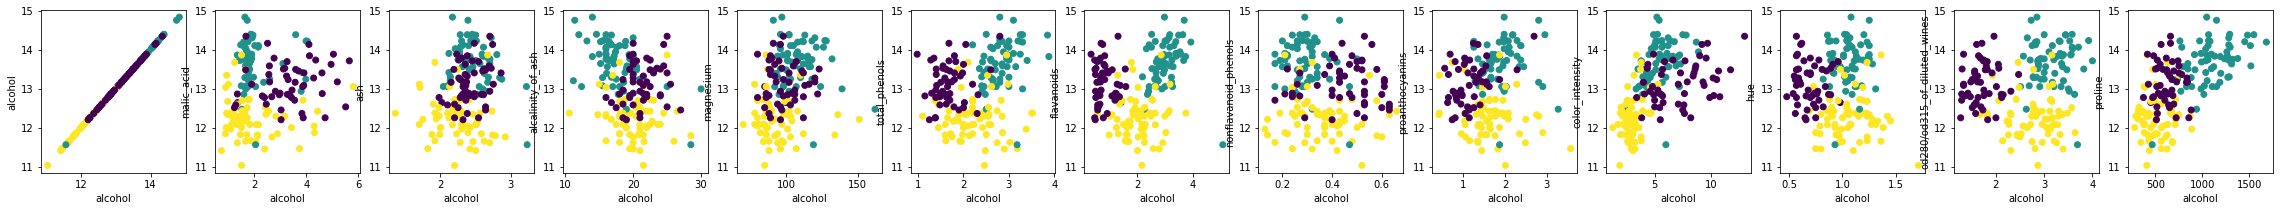

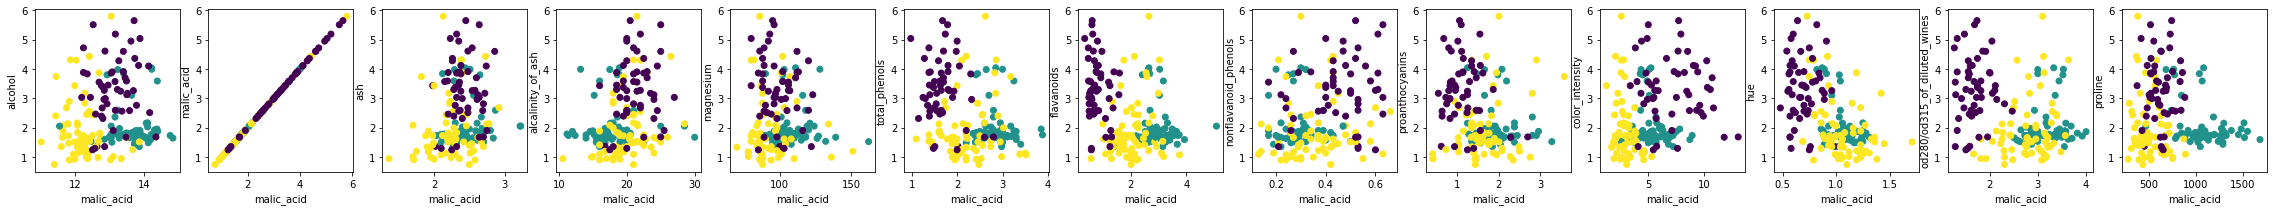

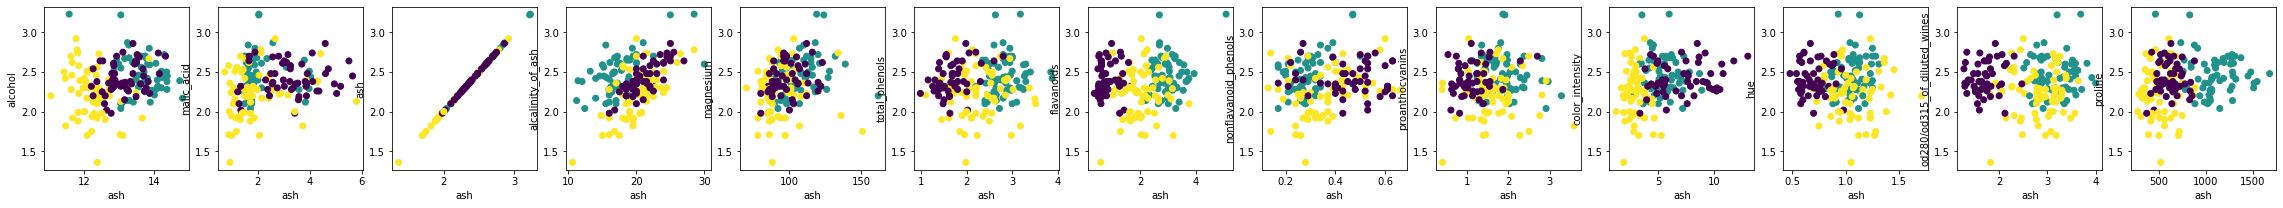

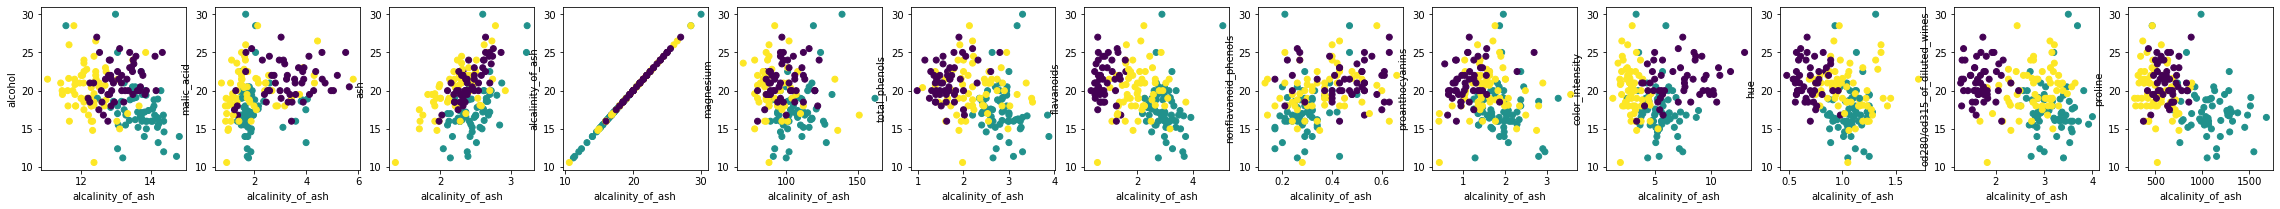

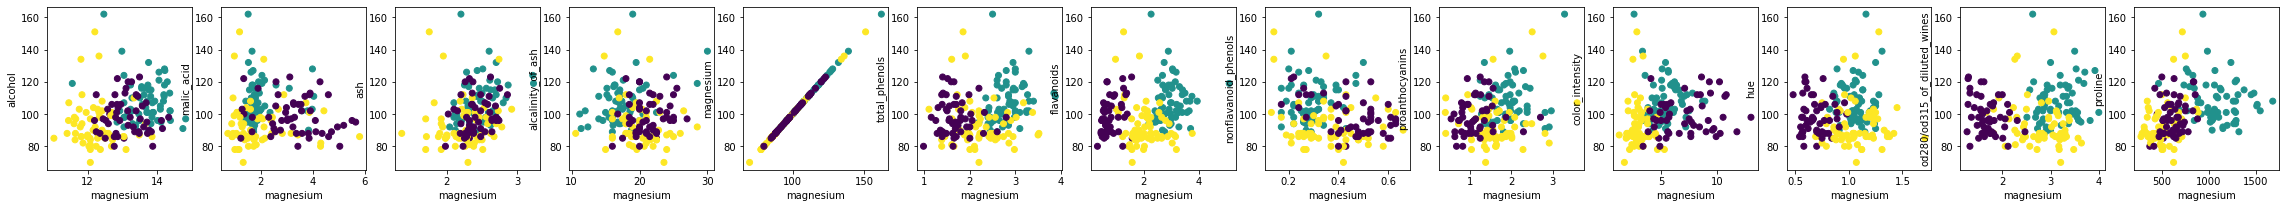

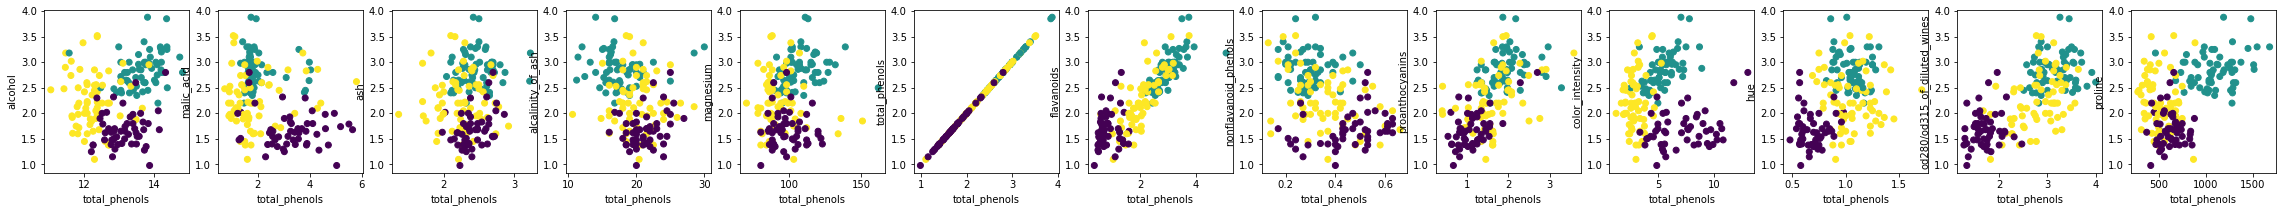

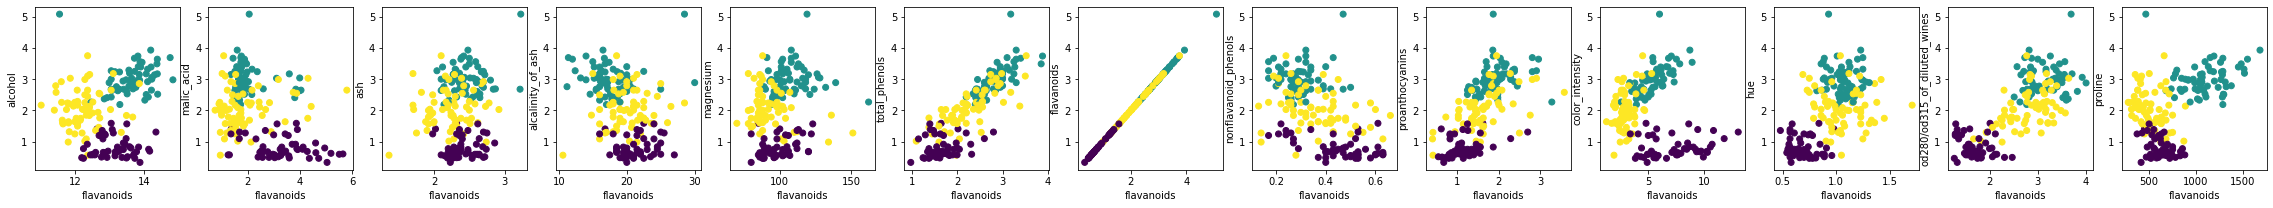

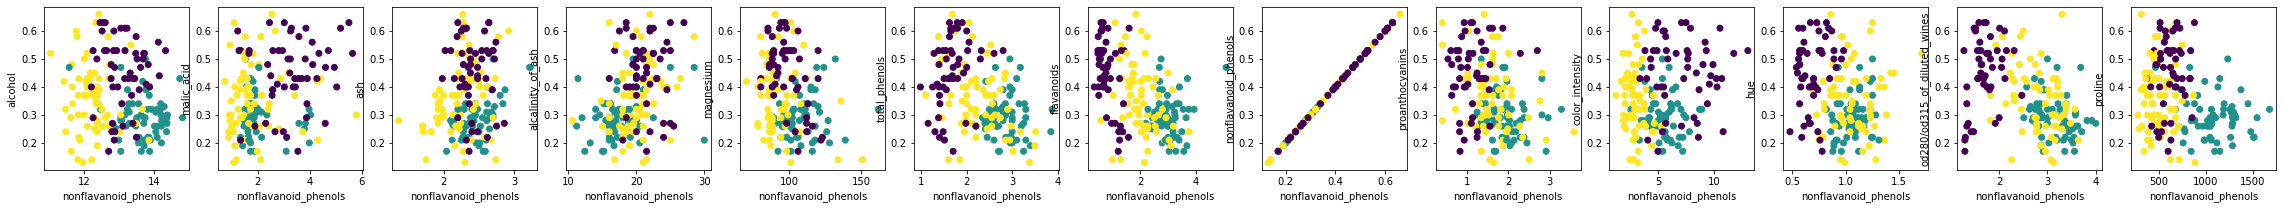

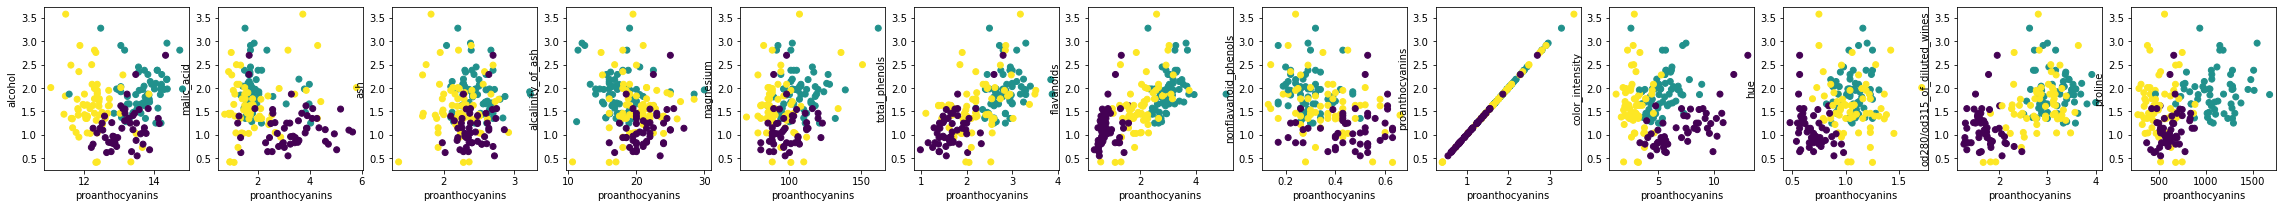

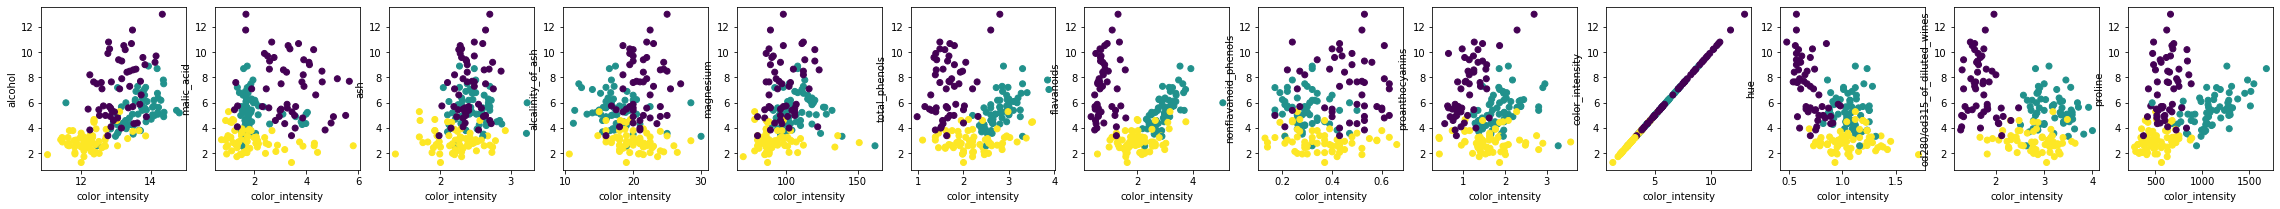

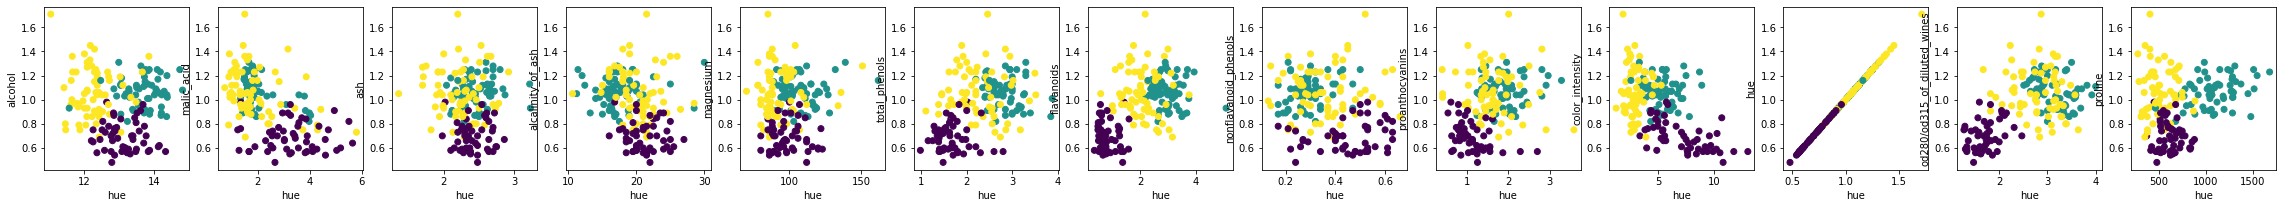

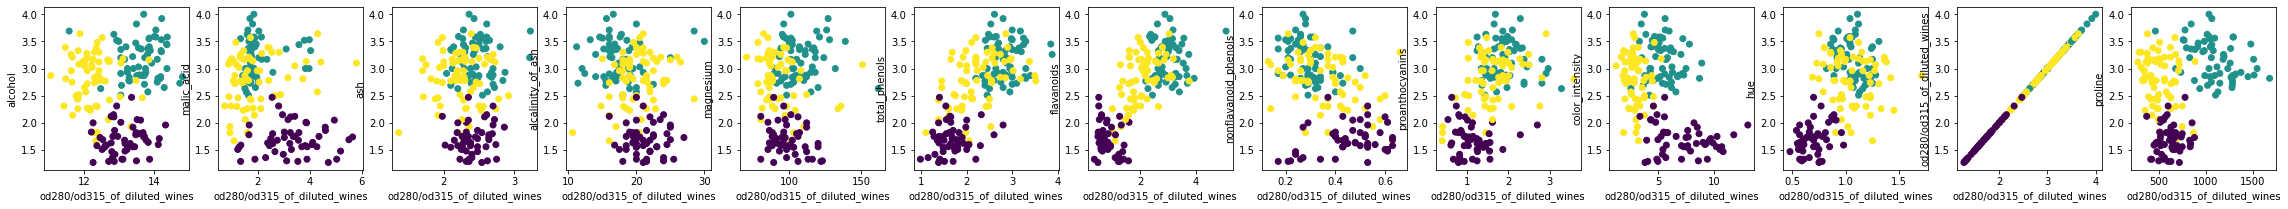

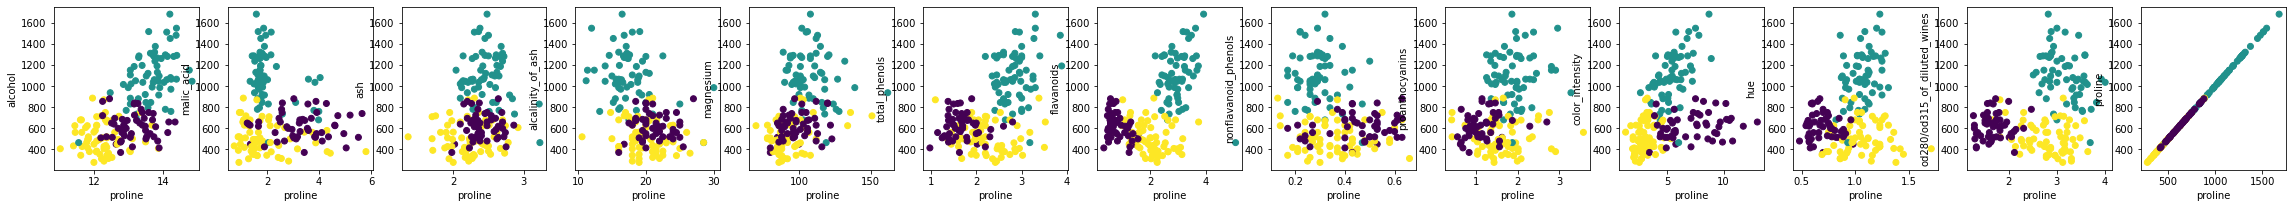

In [7]:
# 일정한 결과로 분류하기 위해 random state는 0으로 설정.
cluster = KMeans(n_clusters=3, max_iter=1000)
k_cluster = cluster.fit(X_pre)

y_pred = k_cluster.predict(X_pre)

def wine_correlation(index):
    n = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    plt.figure(figsize=(40,3))
    for i in range(len(n)):
        plt.subplot(1,13,i+1)
        plt.scatter(X[:,n[i]],X[:,index], c=y_pred)
        plt.xlabel(wine.feature_names[index])
        plt.ylabel(wine.feature_names[n[i]])

for m in range(13):
    wine_correlation(m)

seaborn에서 대각선 성분은 해당 lable에 따른 feature가 어떤 분포를 가지는지를 나타낸 것이다\.

K-means에서 plot한 대각선은 x,y 축이 같기 때문에 직선 형태로 나타난다\.

K-means clustering은 unsupervised learning이기 때문에 위의 그림처럼 2차원 축으로 나타낸 것 만으로는 얼마나 군집이 잘 만들어졌는지 확인할 수는 없다\.

예측값 y_pred가 어떤 결과가 나왔고, data를 어떤 군집으로 분류를 했는지 각 군집에 할당된 data의 개수를 count하면 얼마나 clustering이 잘 되어있는지 알 수 있다.

In [8]:
km_class_0 = []
km_class_1 = []
km_class_2 = []
for i in range(len(y_pred)):
    if y[i] == 0:
        km_class_0.append(y_pred[i])
    elif y[i] == 1:
        km_class_1.append(y_pred[i])
    elif y[i] == 2:
        km_class_2.append(y_pred[i])

print('1st cluster', len(km_class_0))
print('2nd cluster', len(km_class_1))
print('3rd cluster', len(km_class_2))

1st cluster 59
2nd cluster 71
3rd cluster 48


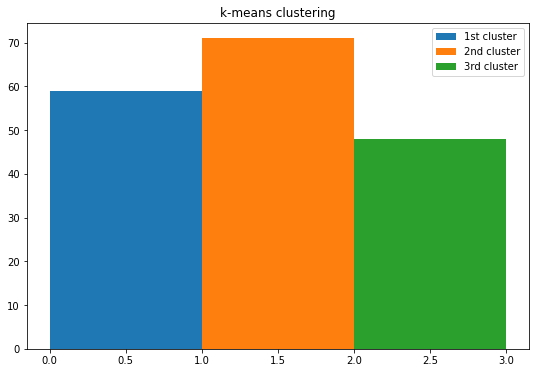

In [9]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)

x_axis = [0.5]
y_axis1 = len(km_class_0)
y_axis2 = len(km_class_1)
y_axis3 = len(km_class_2)

w = 1
plt.title(label='k-means clustering')
ax.bar(np.array(x_axis),y_axis1,width=w,label='1st cluster')
ax.bar(np.array(x_axis)+w,y_axis2,width=w,label='2nd cluster')
ax.bar(np.array(x_axis)+2*w,y_axis3,width=w,label='3rd cluster')
ax.legend(fontsize=10)

wine dataset에서 각 lable의 개수와 똑같이 분류한 것을 알 수 있다\.
unsupervised learning이기 때문에 각각 분류된 cluster의 값이 무엇인지는알 수 없지만 원래의 dataset과 똑같이 분류하는 것으로 봐선 13개 특성을 모두 이용하여 clustering을 하면 잘 분류하는 것으로 보여진다.

# PCA + K-Means clustering
clustering 결과를 시각화할 수 있도록(3차원으로) PCA로 3가지 성분을 골라내어 clustering을 진행한다.

In [10]:
from sklearn.model_selection import train_test_split
X=wine['data']
y=wine['target']

from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler().fit_transform(X)

In [11]:
# 3개의 특성으로 차원을 축소
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
x_pca = pca.fit_transform(x_sc)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)
print(np.sum(explained_variance))

[0.36198848 0.1920749  0.11123631]
0.6652996889318528


3개의 주요 성분들을 골라낸다. \
각 성분들인 36%, 19% 11% 정도를 사용하고 전체의 66% 특성을 사용한다.

In [12]:
pca_cluster = KMeans(n_clusters=3, max_iter=1000)
pca_k_cluster = pca_cluster.fit(x_pca)

y_pred_pca = pca_k_cluster.predict(x_pca)

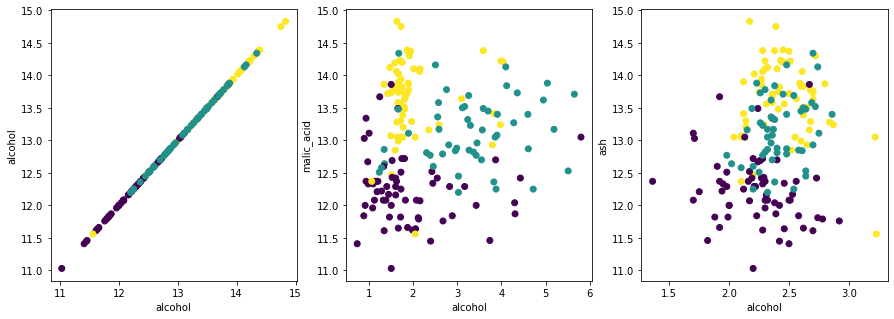

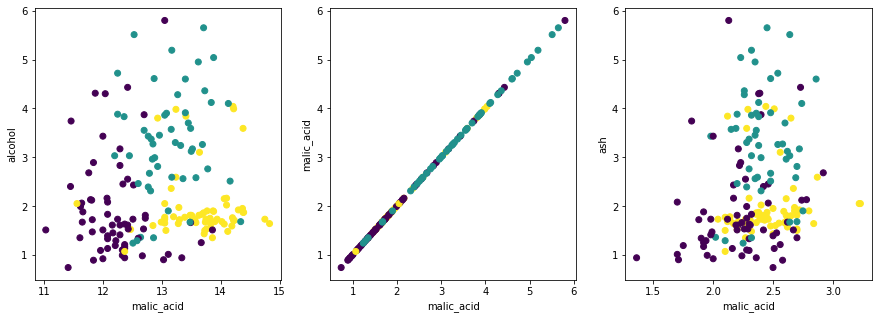

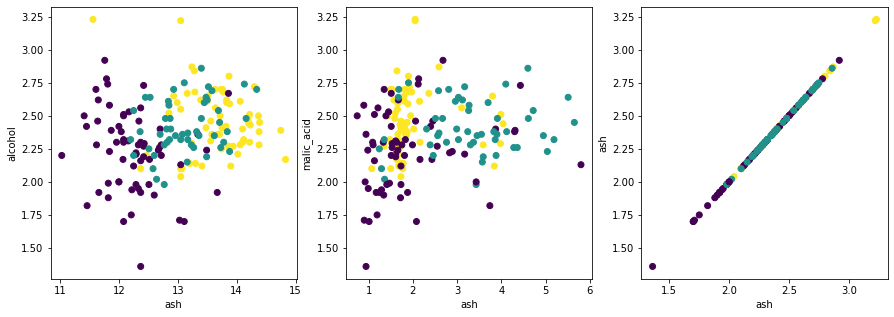

In [13]:
def wine_correlation(index):
    n = [0,1,2]
    plt.figure(figsize=(15,5))
    for i in range(len(n)):
        plt.subplot(1,3,i+1)
        plt.scatter(X[:,n[i]],X[:,index], c=y_pred_pca)
        plt.xlabel(wine.feature_names[index])
        plt.ylabel(wine.feature_names[n[i]])
    
for m in range(3):
    wine_correlation(m)

Text(0.5, 0, 'x3')

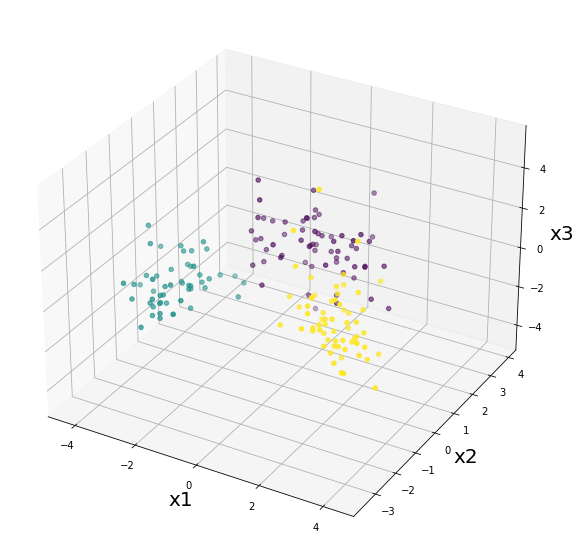

In [14]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d') # 3D object
ax.scatter3D(x_pca[:,0],x_pca[:,1],x_pca[:,2], c = y_pred_pca)
ax.set_xlabel('x1',size=20)
ax.set_ylabel('x2',size=20)
ax.set_zlabel('x3',size=20)

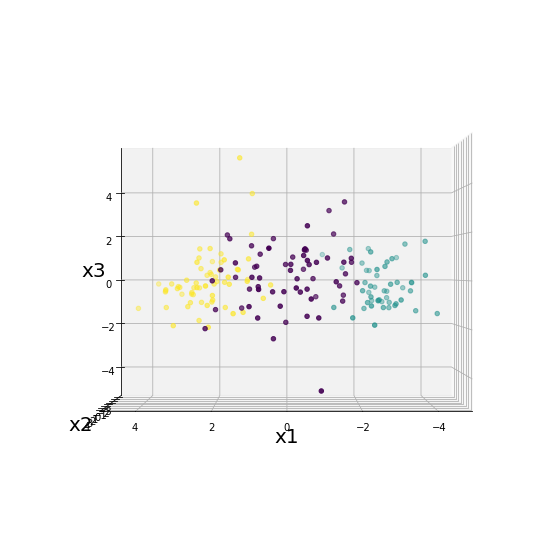

In [15]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d') # 3D object
ax.scatter3D(x_pca[:,0],x_pca[:,1],x_pca[:,2], c = y_pred_pca)
ax.set_xlabel('x1',size=20)
ax.set_ylabel('x2',size=20)
ax.set_zlabel('x3',size=20)
ax.view_init(elev=0, azim=90)

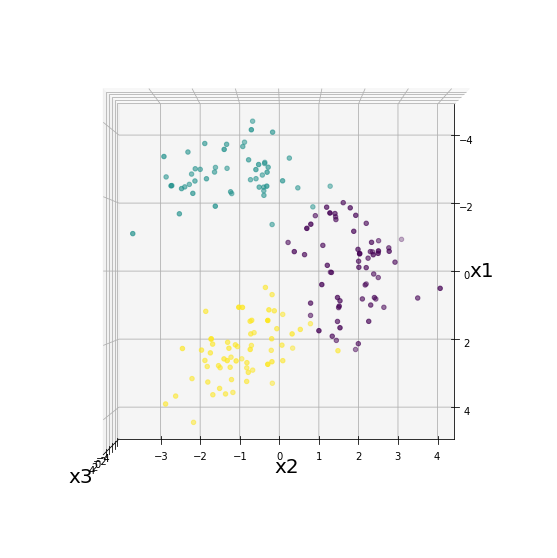

In [16]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d') # 3D object
ax.scatter3D(x_pca[:,0],x_pca[:,1],x_pca[:,2], c = y_pred_pca)
ax.set_xlabel('x1',size=20)
ax.set_ylabel('x2',size=20)
ax.set_zlabel('x3',size=20)
ax.view_init(elev=90, azim=0) 

3D 그래프는 3개의 feature로 PCA를 먼저 적용한 후에 clustering을 적용한 것의 분포이다\.
3가지 feature만 이용해도 clustering을 잘 한 것처럼 보인다\.
마지막 3D plot에서 cluster가 명확하게 구분되는 것을 한 눈에 알 수 있다.

In [17]:
pca_km_class_0 = []
pca_km_class_1 = []
pca_km_class_2 = []
for i in range(len(y_pred)):
    if y[i] == 0:
        pca_km_class_0.append(y_pred_pca[i])
    elif y[i] == 1:
        pca_km_class_1.append(y_pred_pca[i])
    elif y[i] == 2:
        pca_km_class_2.append(y_pred_pca[i])
        
print('1st cluster', len(pca_km_class_0))
print('2nd cluster', len(pca_km_class_1))
print('3rd cluster', len(pca_km_class_2))

1st cluster 59
2nd cluster 71
3rd cluster 48


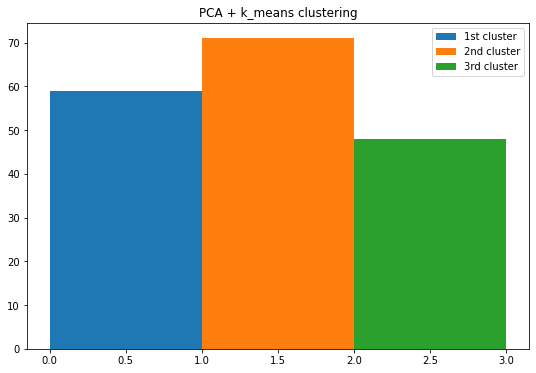

In [18]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)

x_axis = [0.5]
y_axis1 = len(pca_km_class_0)
y_axis2 = len(pca_km_class_1)
y_axis3 = len(pca_km_class_2)

w = 1
plt.title(label='PCA + k_means clustering')
ax.bar(np.array(x_axis),y_axis1,width=w,label='1st cluster')
ax.bar(np.array(x_axis)+w,y_axis2,width=w,label='2nd cluster')
ax.bar(np.array(x_axis)+2*w,y_axis3,width=w,label='3rd cluster')
ax.legend(fontsize=10)

3개의 특성만 주성분분석으로 골라내어 clustering을 해도 잘 구분되었다.

### hierarchical clustering

agglomerative hierarchical clustering은 작은 군집에서 큰 군집으로 군집을 만들어가는 방법이다.\
데이터들 사이의 거리를 측정하여 가까운 것들 부터 군집화하여 점차 큰 군집으로 만든다.\
거리를 구하는 방법으로는euclidean, Mahalanobis method가 있다.\
.
두 군집사이의 거리를 eculidean으로 구하는지 mahalnobis로 구하는지에 따라 사용할 수 있는 linkage methid가 달라진다.\
.
euclidean distance를 사용하면 5가지 방법이 모두 사용 가능하다.\
complete / single / centroid / average /ward\
.
mahalanobis distance를 이용하면 3가지 방법만 사용 가능하다.\
complete / single / average

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
* Ward\
minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.\
모든 군집 사이의 거리 제곱의 합을 최소화하여 cluster를 만드는 방법.\
.
* Maximum or complete linkage\
minimizes the maximum distance between observations of pairs of clusters.\
2개의 군집의 최장거리를 최소화하는 방향으로 cluster를 형성하는 방법.\
.
* Average linkage\
minimizes the average of the distances between all observations of pairs of clusters.\
모든 군집에서 두 군집 사이의 거리의 평균거리가 가장 짧은 데이터끼리 cluster를 만드는 방법.\
. 
* Single linkage\
minimizes the distance between the closest observations of pairs of clusters.\
가장 가까운 2개의 데이터를 묶어서 cluster를 만드는 방법.\
.
* centroid linkage\
centroid linkage는 cluster의 중심사이의 거리가 최소인 것들끼리 cluster를 만드는 방법이다.\
.\
.\
euclidean과 mahalanobis distnance에 둘다 사용 가능한 link는 complete link와 average link이므로 이 방법만을 이용해서 clustering을 진행하였다.

In [19]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

wine = load_wine()
X=wine['data']
y=wine['target']

In [20]:
distance = ['euclidean', 'mahalanobis']
link = ['complete', 'average'] 

In [21]:
def plot_dendrogram(dist,link):
    plt.figure(figsize=(10,10))
    plt.title('Hierarchical Clustering Dendrogram'+'_'+dist+'_'+link, fontsize=25)
    cluster = linkage(X, method=link, metric = dist)
    dendrogram(cluster)
    plt.show()

In [22]:
def plot_element(dist,link):
    print(dist,'+',link)
    cluster = AgglomerativeClustering(n_clusters = 3, affinity=dist, linkage=link)
    y_pred = cluster.fit_predict(X)
    
    cluster_0 = []
    cluster_1 = []
    cluster_2 = []
    for i in range(len(y_pred)):
        if y[i] == 0:
            cluster_0.append(y_pred[i])
        elif y[i] == 1:
            cluster_1.append(y_pred[i])
        elif y[i] == 2:
            cluster_2.append(y_pred[i])
    print('1st cluster', len(cluster_0))
    print('2nd cluster', len(cluster_1))
    print('3rd cluster', len(cluster_2))
    print('')
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(1,1,1)
    x_axis = [0.5]
    y_axis1 = len(cluster_0)
    y_axis2 = len(cluster_1)
    y_axis3 = len(cluster_2)
    w = 1
    ax.bar(np.array(x_axis),y_axis1,width=w,label='1st cluster')
    ax.bar(np.array(x_axis)+w,y_axis2,width=w,label='2nd cluster')
    ax.bar(np.array(x_axis)+2*w,y_axis3,width=w,label='3rd cluster')
    ax.legend(fontsize=10)

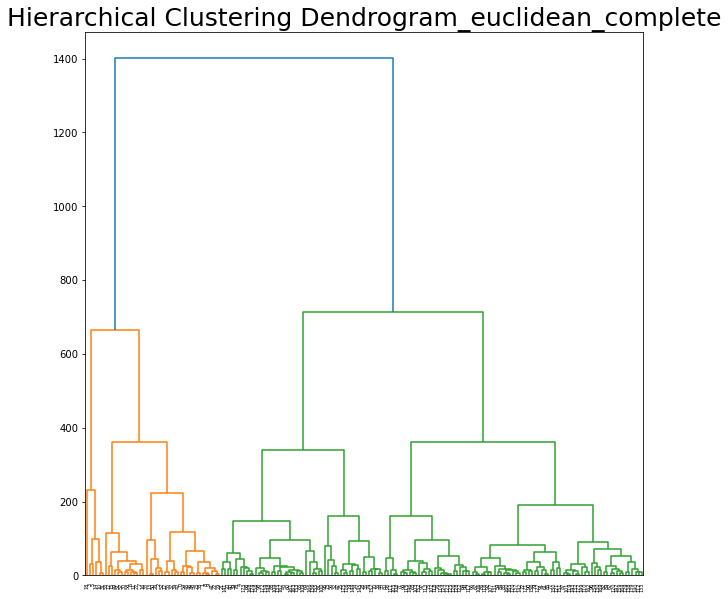

In [23]:
plot_dendrogram(distance[0],link[0])

euclidean + complete
1st cluster 59
2nd cluster 71
3rd cluster 48



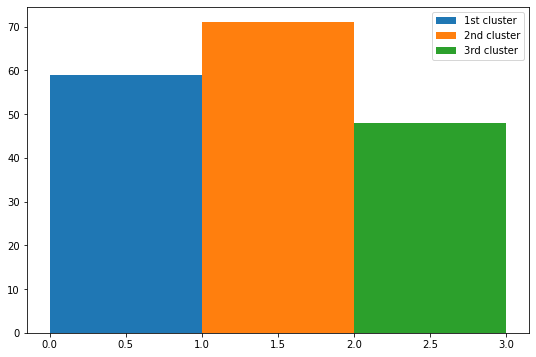

In [24]:
plot_element(distance[0],link[0])

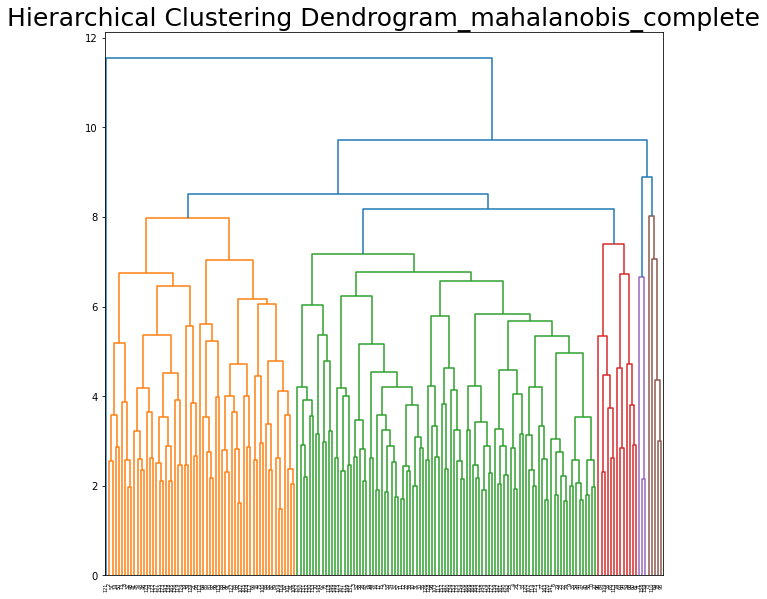

In [25]:
plot_dendrogram(distance[1],link[0])

dendrogram을 그려서 확인을해보면 마지막에 

mahalanobis + complete
1st cluster 59
2nd cluster 71
3rd cluster 48



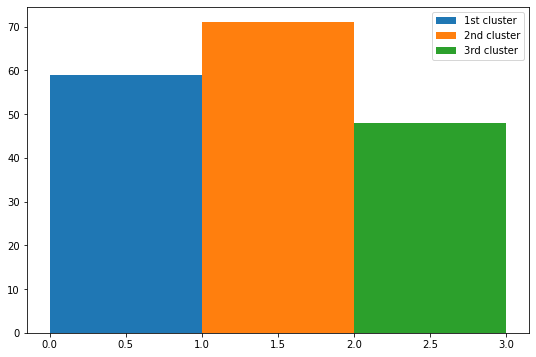

In [26]:
plot_element(distance[1],link[0])

Dendrogram을 그려서 확인해보면 작은 cluster끼리 모여서 큰 cluster를 만드는 것을 시각적으로 볼 수 있다. 그리고 각 cluster로 분류된 feature의 개수를 count해보면 원래 winw dataset과 같은 결과로 분류한 것을 알 수 있다.

euclidean + average
1st cluster 59
2nd cluster 71
3rd cluster 48



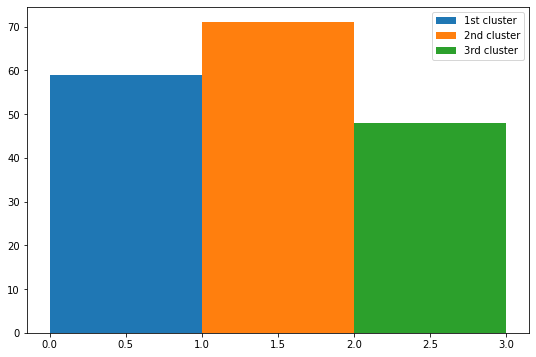

In [27]:
plot_element(distance[0],link[1])

mahalanobis + average
1st cluster 59
2nd cluster 71
3rd cluster 48



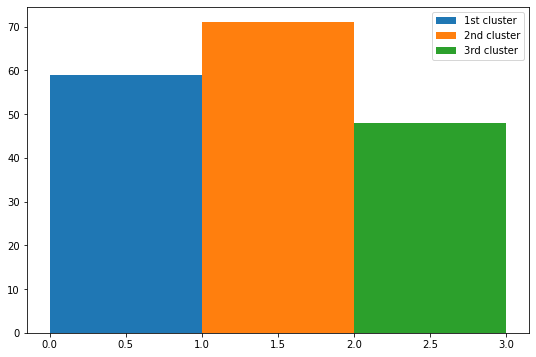

In [28]:
plot_element(distance[1],link[1])

complete link처럼 dendrogram을 그리지는 않았지만 average link로 clustering을 해도 결과를 보면 똑같이 분류한 것을 알 수 있다. 

#### 결론
wine dataset을 분류하는 방법으로 먼저 k_means clustering을 적용해보고\
다음에 PCA(주성분 분석)을 적용한 후에 k_means clustering을 사용했다.\
그리고 마지막으로 Hierarchical Clustering(계층적 군집화)를 이용해서 clustering을 했다.\
.\
3가지 방법 모두 dataset을 똑같이 분류했다. dataset이 많지 않아 알고리즘이 분류를 하는데 있어 짧은 시간과 높은 정확도로 분류한 것으로 보인다.